### Introduction to Medusa


## Loading an example ensemble and inspecting its parts

In `medusa`, ensembles of genome-scale metabolic network reconstructions (GENREs) are represented using the `medusa.Ensemble` class. To demonstrate the functionality and attributes of this class, we'll, load a test ensemble. Here, we use a function that takes the *E. coli* core metabolism reconstruction from cobrapy and randomly removes components to generate ensemble members.

In [1]:
import medusa
from medusa.test.test_ensemble import construct_textbook_ensemble

example_ensemble = construct_textbook_ensemble()

Each `Ensemble` has three key attributes that specify the structure of the ensemble, which we'll describe below. This schematic also summarizes the structure of `Ensemble` and how each attribute relates to cobrapy objects:

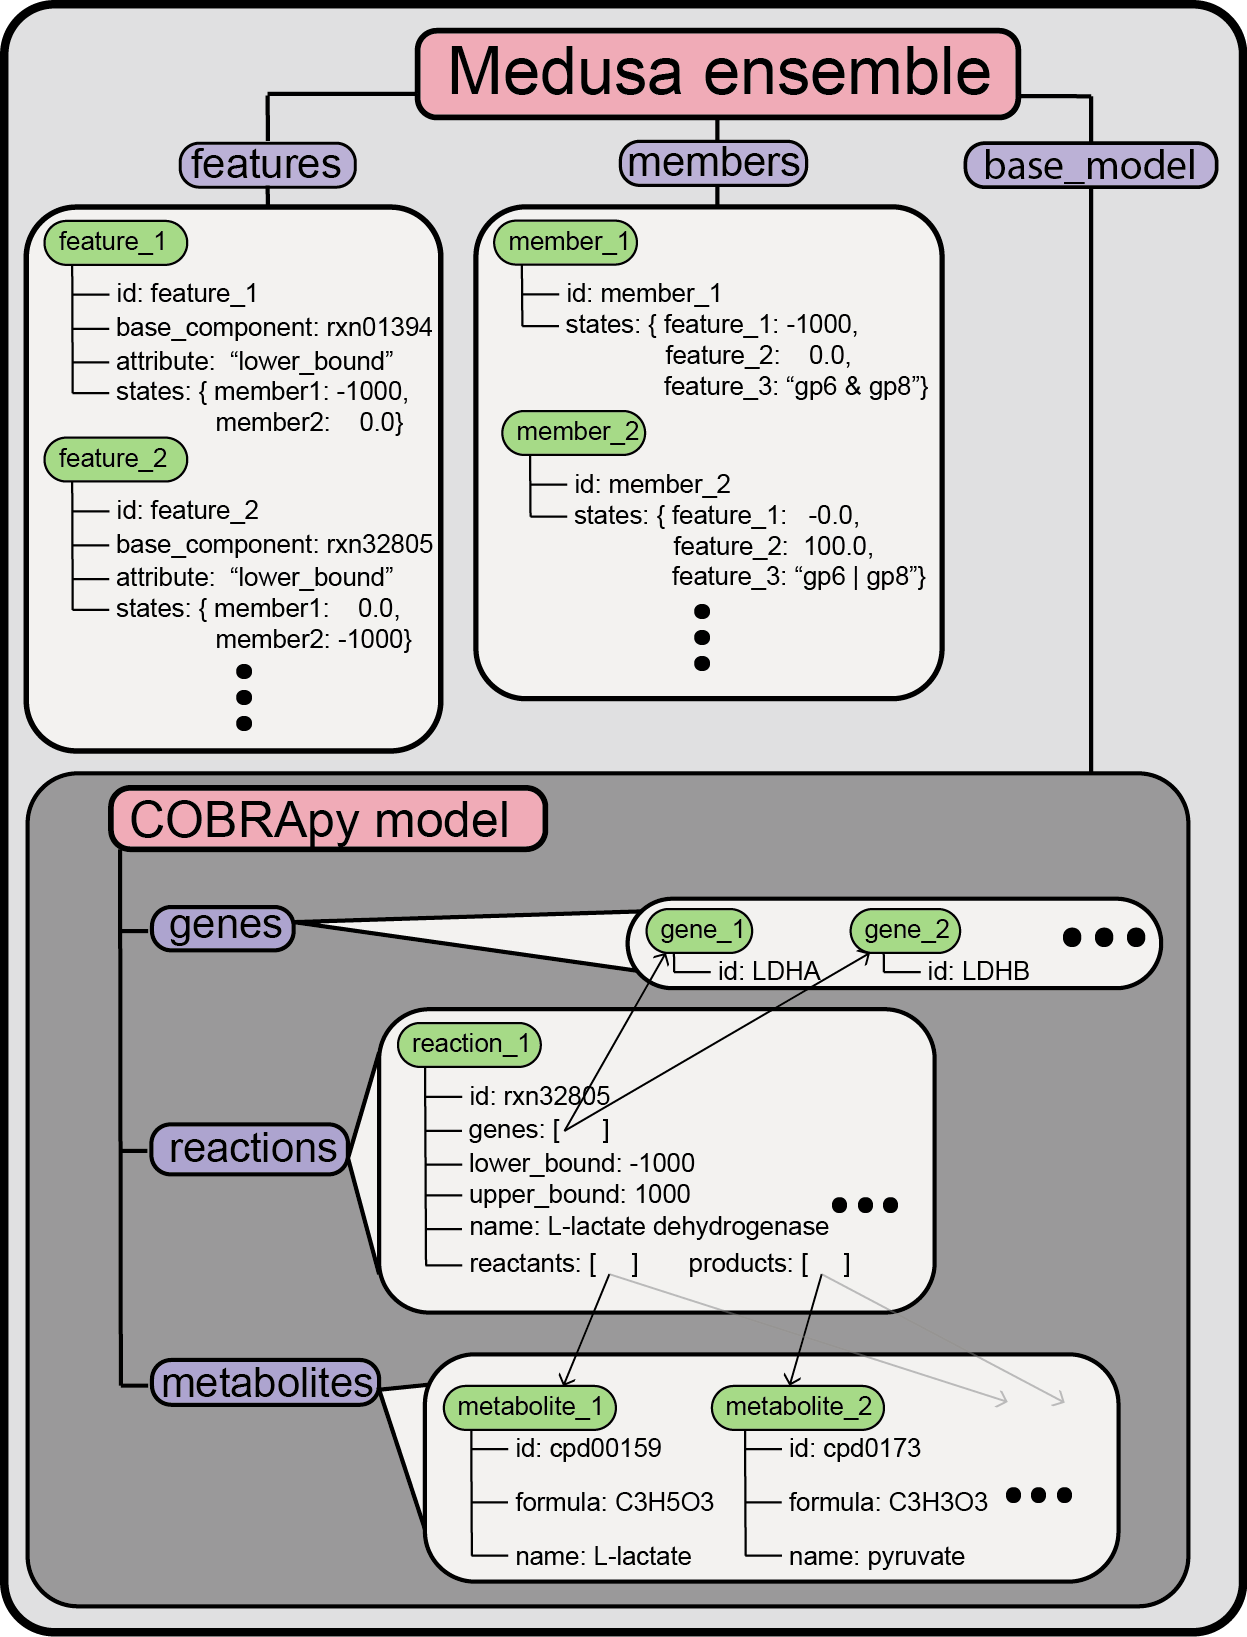

In [2]:
from IPython.display import Image
Image(filename='medusa_structure.png', width=500) 

## Components of an ensemble: base_model

The first is the `base_model`, which is a `cobra.Model` object that represents all the possible states of an individual member within the ensemble. Any reaction, metabolite, or gene that is only present in a subset of ensemble members will be present in the `base_model` for an `Ensemble`. You can inspect the `base_model` and manipulate it just like any other `cobra.Model` object.

In [3]:
extracted_base_model = example_ensemble.base_model
extracted_base_model

Name,first_textbook
Memory address,0x07efcac754f98
Number of metabolites,72
Number of reactions,95
Objective expression,1.0*Biomass_Ecoli_core - 1.0*Biomass_Ecoli_core_reverse_2cdba
Compartments,"cytosol, extracellular"


## Components of an ensemble: members

The second attribute that each `Ensemble` has is a structure called `members`. `Ensemble.members` maps an identifier for each individual GENRE in the ensemble to a `medusa.Member` object, which holds information about a single member (where a "single member" is an individual GENRE within an ensemble). 

`Ensemble.members` is represented by a custom class implemented in cobrapy called a [DictList](https://cobrapy.readthedocs.io/en/latest/_modules/cobra/core/dictlist.html), which is essentially a standard dictionary in python that can also be accessed using integer indices like a list (e.g. dictlist[0] returns the first element in the dictlist).

In [4]:
# looks like a list when we print it
example_ensemble.members

[<Member first_textbook at 0x7efcac983be0>,
 <Member second_textbook at 0x7efcac983ef0>]

In [5]:
# Get the first member with integer indexing
first_member = example_ensemble.members[0]

Each `Member` within the `Ensemble.members` DictList has a handful of attributes as well. You can check the ensemble that the member belongs to, the id of the member, and the network states for that member (we'll discuss states more below).

In [6]:
print(first_member.ensemble)
print(first_member.id)
print(first_member.states)

textbook_ensemble
first_textbook
{<Feature ACONTb_lower_bound at 0x7efcac761e10>: -1000.0, <Feature ACKr_lower_bound at 0x7efcac91d128>: 0.0, <Feature ACt2r_upper_bound at 0x7efcac91db38>: 1000.0, <Feature ACt2r_lower_bound at 0x7efcac91dd68>: -1000.0, <Feature ACKr_upper_bound at 0x7efcac91d668>: 0.0, <Feature ACALDt_upper_bound at 0x7efcac91d198>: 0.0, <Feature ACALDt_lower_bound at 0x7efcac91d390>: 0.0, <Feature ACONTb_upper_bound at 0x7efcac91def0>: 1000.0}


## Components of an ensemble: features

The states printed above are directly connected to the third attribute that `Ensemble` contains, `Ensemble.features`, which is also a DictList object. `Ensemble.features` contains `medusa.Feature` entries, which specify the components of the `Ensemble.base_model` that vary across the entire ensemble. 

In [7]:
example_ensemble.features

[<Feature ACALDt_lower_bound at 0x7efcac91d390>,
 <Feature ACALDt_upper_bound at 0x7efcac91d198>,
 <Feature ACKr_lower_bound at 0x7efcac91d128>,
 <Feature ACKr_upper_bound at 0x7efcac91d668>,
 <Feature ACONTb_lower_bound at 0x7efcac761e10>,
 <Feature ACONTb_upper_bound at 0x7efcac91def0>,
 <Feature ACt2r_lower_bound at 0x7efcac91dd68>,
 <Feature ACt2r_upper_bound at 0x7efcac91db38>]

Here, we see that this `Ensemble` has 8 features. Each `Feature` object specifies a network component that has a variable parameter value in at least one member of the ensemble (e.g. at least one ensemble member is missing the reaction).

In this case, there are features for 4 reactions, `ACALDt`,`ACKr`,`ACONTb`, and `ACt2r`. There are two `Feature` objects for each reaction, corresponding to the lower and upper bound for that reaction. A feature will be generated for any component of a `cobra.Model` (e.g. `Reaction`, `Gene`) that has an attribute value (e.g. `Reaction.lower_bound`, `Reaction.gene_reaction_rule`) that varies across the ensemble. As you can see from this result, a feature is created at the level of the specific attribute that varies, *not* the model component (e.g. we created a `Feature` for each *bound* of each `Reaction`, not for the `Reaction` objects themselves).

This information can be inferred from feature ID (`medusa.Feature.id`), but each `Feature` also has a set of attributes that encode the information. Some useful attributes, described in the order printed below:  getting the `Ensemble` that the `Feature` belongs to, the component in the `Ensemble.base_model` that the `Feature` describes, the attribute of the component in the `Ensemble.base_model` whose value the `Feature` specifies, and the ID of the `Feature`:

In [8]:
first_feature = example_ensemble.features[0]
print(first_feature.ensemble)
print(first_feature.base_component)
print(first_feature.component_attribute)
print(first_feature.id)

textbook_ensemble
ACALDt: acald_e <=> acald_c
lower_bound
ACALDt_lower_bound


Just as each `member` has an attribute, `states`, that returns the value of every feature for that `member`, each `feature` has a `states` dictionary that maps each `member.id` to the value of the `feature` in the corresponding `member`, e.g.:

In [9]:
print(first_feature.states)

{'second_textbook': -1000.0, 'first_textbook': 0.0}


## Strategies for getting information about an ensemble and its members

Where possible, we use conventions from cobrapy for accessing information about attributes. In cobrapy, the `Model` object has multiple containers in the form of DictLists: `Model.reactions`,`Model.metabolites`,`Model.genes`. Equivalently in medusa, each `Ensemble` has similarly constructed containers: `Ensemble.members` and `Ensemble.features`.

As such, information about specific `Member` and `Feature` objects can be accessed just like `Reaction`, `Metabolite`, and `Gene` objects in cobrapy:

In [10]:
# Remember, our Ensemble holds a normal cobrapy Model in base_model
extracted_base_model = example_ensemble.base_model
# Accessing object by id is common in cobrapy
rxn = extracted_base_model.reactions.get_by_id('ACALDt')
# We can do the same thing for features:
feat = example_ensemble.features.get_by_id('ACALDt_lower_bound')
print(rxn)
print(feat.base_component)
print(feat.component_attribute)

# And for members:
memb = example_ensemble.members.get_by_id('first_textbook')
print('\nHere are the states for this member:')
print(memb.states)

ACALDt: acald_e <=> acald_c
ACALDt: acald_e <=> acald_c
lower_bound

Here are the states for this member:
{<Feature ACONTb_lower_bound at 0x7efcac761e10>: -1000.0, <Feature ACKr_lower_bound at 0x7efcac91d128>: 0.0, <Feature ACt2r_upper_bound at 0x7efcac91db38>: 1000.0, <Feature ACt2r_lower_bound at 0x7efcac91dd68>: -1000.0, <Feature ACKr_upper_bound at 0x7efcac91d668>: 0.0, <Feature ACALDt_upper_bound at 0x7efcac91d198>: 0.0, <Feature ACALDt_lower_bound at 0x7efcac91d390>: 0.0, <Feature ACONTb_upper_bound at 0x7efcac91def0>: 1000.0}


These DictList objects are all [iterables](https://docs.python.org/3/glossary.html#term-iterable), meaning that any python operation that acts on an iterable can take them as input. This is often convenient when working with either cobrapy `Model`s or medusa `Ensemble`s. For example, suppose we are interested in getting the list of all components described by features in the `Ensemble`:

In [11]:
components = []
for feat in example_ensemble.features:
    components.append(feat.base_component)

print(components)

# or, use the one-liner which gives the same result:
components = [feat.base_component for feat in example_ensemble.features]

print(components)

[<Reaction ACALDt at 0x7efcac66f0b8>, <Reaction ACALDt at 0x7efcac66f0b8>, <Reaction ACKr at 0x7efcac66f128>, <Reaction ACKr at 0x7efcac66f128>, <Reaction ACONTb at 0x7efcac758b00>, <Reaction ACONTb at 0x7efcac758b00>, <Reaction ACt2r at 0x7efcac7587f0>, <Reaction ACt2r at 0x7efcac7587f0>]
[<Reaction ACALDt at 0x7efcac66f0b8>, <Reaction ACALDt at 0x7efcac66f0b8>, <Reaction ACKr at 0x7efcac66f128>, <Reaction ACKr at 0x7efcac66f128>, <Reaction ACONTb at 0x7efcac758b00>, <Reaction ACONTb at 0x7efcac758b00>, <Reaction ACt2r at 0x7efcac7587f0>, <Reaction ACt2r at 0x7efcac7587f0>]
